In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
# Load the Boston Housing dataset from your file path
file_path = r"C:\Users\popov\BostonHousingAnalysis\data\BostonHousing.csv"
df_original = pd.read_csv(file_path)

# Display the first few rows to ensure the data is loaded correctly
df_original.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
# Create new columns based on domain knowledge and transformations
df_transformed = df_original.copy()
df_transformed['lstat_squared'] = df_transformed['lstat'] ** 2
df_transformed['tax_age_interaction'] = df_transformed['tax'] * df_transformed['age']

# Apply log transformations to address potential skewness
df_transformed['log_crim'] = np.log1p(df_transformed['crim'])
df_transformed['log_tax'] = np.log1p(df_transformed['tax'])

# Display the first few rows of the transformed dataframe
df_transformed.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,lstat_squared,tax_age_interaction,log_crim,log_tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.8004,19299.2,0.006300,5.693732
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,83.5396,19093.8,0.026944,5.493061
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,16.2409,14786.2,0.026924,5.493061
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,8.6436,10167.6,0.031857,5.407172
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,28.4089,12032.4,0.066770,5.407172


In [12]:
# Standardize the dataset excluding the target variable 'medv' and the categorical 'chas'
scaler = StandardScaler()
columns_to_scale = df_transformed.columns.difference(['medv', 'chas'])
df_transformed[columns_to_scale] = scaler.fit_transform(df_transformed[columns_to_scale])

# Display basic statistics to check scaling
print(df_transformed.describe())


               crim            zn         indus        chas           nox  \
count  5.060000e+02  5.060000e+02  5.060000e+02  506.000000  5.060000e+02   
mean  -8.513173e-17  3.306534e-16  2.804081e-16    0.069170 -8.071058e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00    0.253994  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00    0.000000 -1.465882e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01    0.000000 -9.130288e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01    0.000000 -1.442174e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00    0.000000  5.986790e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00    1.000000  2.732346e+00   

                 rm           age           dis           rad           tax  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -5.189086e-17 -2.650493e-16  8.293761e-17  1.514379e-15 -9.934960e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.0009

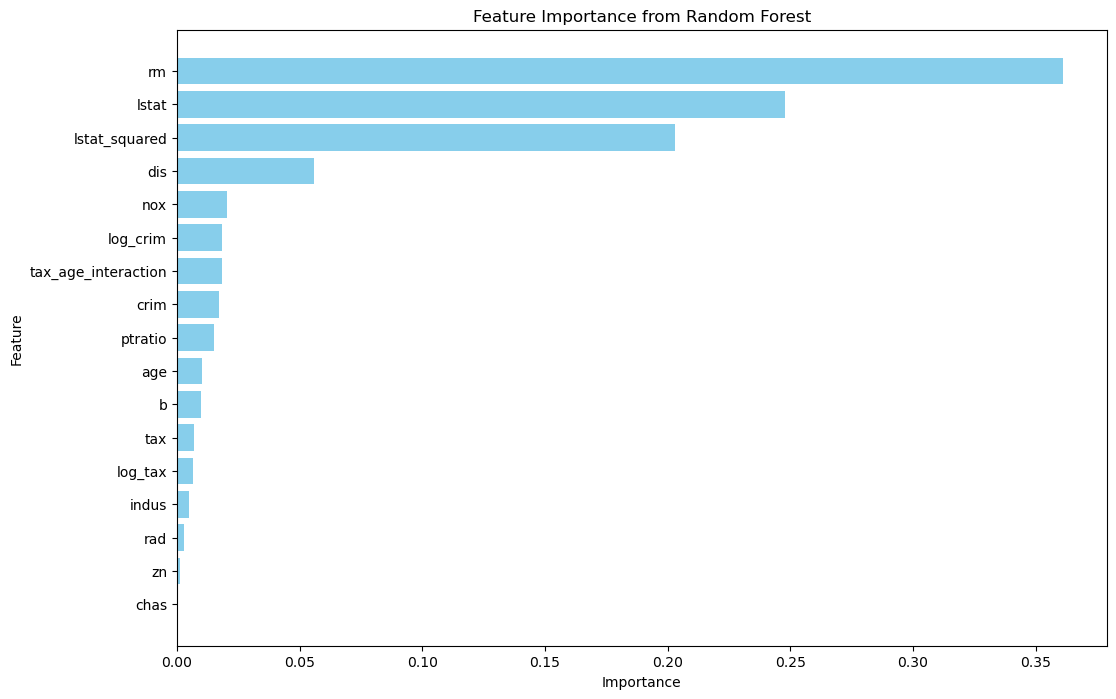

In [13]:
# Split the dataset into features and target
X = df_transformed.drop('medv', axis=1)
y = df_transformed['medv']

# Fit a Random Forest model to the data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importances and visualize them
feature_importances = rf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model using all features
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

# Train another linear regression model using selected features
selected_features = ['rm', 'lstat', 'lstat_squared', 'dis', 'nox']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate both models
mae_all = mean_absolute_error(y_test, y_pred_all)
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"All Features - MAE: {mae_all}, MSE: {mse_all}, R2: {r2_all}")
print(f"Selected Features - MAE: {mae_selected}, MSE: {mse_selected}, R2: {r2_selected}")


All Features - MAE: 2.8865494426983767, MSE: 18.11977496620342, R2: 0.7529136751803762
Selected Features - MAE: 3.5715034693581864, MSE: 23.566962761381582, R2: 0.6786342972397963
